## Challenge 2.1

To properly study convergence, one possibility it to look at the result at a given time, for different time steps. Modify the previous program to print the temperature at $t=10$ as a function of $\Delta t$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 10. # maximum time
nsteps = int(tmax/dt)  # number of steps

In [3]:
euler = lambda y, f, dx: y + f*dx 

[56.00973645 56.07746635 56.11118276 56.12800405 56.13640548 56.1406039
 56.14270254 56.14375172 56.14427627 56.14453853]


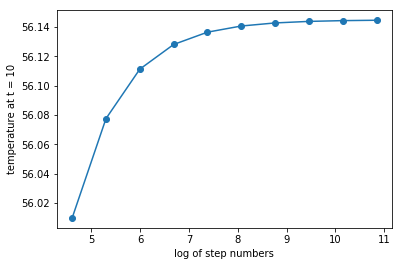

In [10]:
dt = 0.1
N = 10 # how many different dt we are testing
steprange = np.zeros(N)
T_10 = np.zeros(N)

for j in range(0,N):
    T = T0
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_temp = np.zeros(nsteps)
    for i in range(1,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
    steprange[j] = nsteps
    T_10[j] = my_temp[-1]
    dt = dt/2.

plt.plot(np.log(steprange),T_10,'-o')
plt.xlabel('log of step numbers');
plt.ylabel('temperature at t = 10');
print(T_10)

## Challenge 2.2

Repeat the calculation in Challenge 2.1 using 4th order Runge-Kutta

In [19]:
def rk4(func,x0,a=0,b=10,N=20):         # Modify rk4: add one input argument - initial value x0
    h = (b-a)/N

    tpoints = np.arange(a,b,h)
    xpoints = []

    x = x0                              # Initial value of x is x0
    for t in tpoints:
        xpoints.append(x)
        k1 = h*func(x,t)
        k2 = h*func(x+0.5*k1,t+0.5*h)
        k3 = h*func(x+0.5*k2,t+0.5*h)
        k4 = h*func(x+k3,t+h)
        x += (k1+2*k2+2*k3+k4)/6

    return xpoints

[55.87490155 56.01018855 56.0775788  56.11121081 56.12801105 56.13640723
 56.14060434 56.14270265 56.14375174 56.14427627]


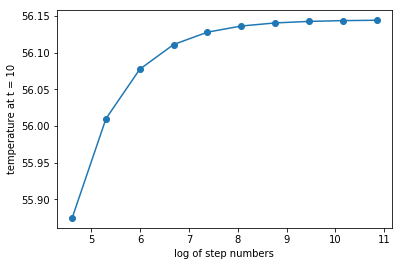

In [22]:
dt = 0.1
N = 10                       # number of dt
steprange = np.zeros(N)
T_10 = np.zeros(N)

f = lambda T,t: -r*(T-Ts)

for j in range(0,N):
    nsteps = int(tmax/dt)    # steps of integration
    T = rk4(f,T0,0,10,nsteps)
    
    steprange[j] = nsteps
    T_10[j] = T[-1]
    
    dt = dt/2.

plt.plot(np.log(steprange),T_10,'-o')
plt.xlabel('log of step numbers');
plt.ylabel('temperature at t = 10');
print(T_10)